# Evaluate model calibration using folktexts

**Prerequisite**: Install folktexts package. Follow setup guide in the [README](https://github.com/socialfoundations/folktexts) or install it locally by navigating to the root folder of the reppository and running `> pip install -e .`

**Summary**: The script loads a language model from Huggingface and demonstrates how to use folktexts to get insights into model calibration, and plot the benchmark results. 

### 1. Check folktexts is installed

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import folktexts
print(f"{folktexts.__version__=}")

folktexts.__version__='0.0.20'


### 2. Load Model from Huggingface

We use the Llama3-8B model for this demo. The workflow can be similarly applied to any model/tokenizer pair.

**Note:** _Set_ `model_name_or_path` to the model's name on huggingface or to the path to a saved pretrained model.

In [3]:
from folktexts.llm_utils import load_model_tokenizer

# Note: make sure you have the necessary persmissions on Huggingface to download the model
# Note: use gpt2 for the demo if you need a smaller model

# model_name_or_path = "meta-llama/Meta-Llama-3-8B"
# model_name_or_path = "gpt2"
model_name_or_path = "/Users/acruz/huggingface-models/google--gemma-1.1-2b-it/"

model, tokenizer = load_model_tokenizer(model_name_or_path)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### 3. Create default benchmarking tasks

We generate ACSIncome benchmark using folktexts. 

**NOTE:** We will subsample the reference data for faster runtime. This should be removed for obtaining reproducible reslts.


In [4]:
%%time
from folktexts.benchmark import Benchmark, BenchmarkConfig

# Note: This argument is optional. Omit, or set to 1 for reproducible benchmarking on the full data
subsampling_ratio = 0.002

bench = Benchmark.make_acs_benchmark(
    model= model,
    tokenizer=tokenizer,
    task_name="ACSIncome",
    subsampling=subsampling_ratio,
    config=BenchmarkConfig(numeric_risk_prompting=False),
)

Loading ACS data...
CPU times: user 43.7 s, sys: 12.9 s, total: 56.6 s
Wall time: 58 s


### 4. Run benchmark

Results will be saved in a folder RESULTS_DIR. There is 
* `.json` file contains evaluated metrics
* `.cvs` file contains risk scores of each datapoint
* folder called `imgs/` contains figures

In [9]:
RESULTS_DIR = "res"
bench.run(results_root_dir=RESULTS_DIR)

ERROR:root:Unknown question type '<class 'folktexts.qa_interface.MultipleChoiceQA'>'; cannot correct ordering bias.


Computing risk estimates:   0%|          | 0/21 [00:00<?, ?it/s]

{'threshold': 0.5,
 'n_samples': 333,
 'n_positives': 119,
 'n_negatives': 214,
 'model_name': 'google--gemma-1.1-2b-it',
 'accuracy': 0.35735735735735735,
 'tpr': 1.0,
 'fnr': 0.0,
 'fpr': 1.0,
 'tnr': 0.0,
 'balanced_accuracy': 0.5,
 'precision': 0.35735735735735735,
 'ppr': 1.0,
 'log_loss': 3.44628617171347,
 'brier_score_loss': 0.6361192259072485,
 'precision_ratio': 0.0,
 'precision_diff': 0.42857142857142855,
 'fnr_ratio': 0.0,
 'fnr_diff': 1.0,
 'ppr_ratio': 1.0,
 'ppr_diff': 0.0,
 'tnr_ratio': 0,
 'tnr_diff': 0.0,
 'balanced_accuracy_ratio': 0.0,
 'balanced_accuracy_diff': 0.5,
 'fpr_ratio': 1.0,
 'fpr_diff': 0.0,
 'tpr_ratio': 0.0,
 'tpr_diff': 1.0,
 'accuracy_ratio': 0.0,
 'accuracy_diff': 0.42857142857142855,
 'equalized_odds_ratio': 0.0,
 'equalized_odds_diff': 1.0,
 'roc_auc': 0.739692138537658,
 'ece': 0.6380880471162536,
 'ece_quantile': 0.6380880471162546,
 'predictions_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/ACSI

### 4. Visualize results

We can also visualize the results inline:

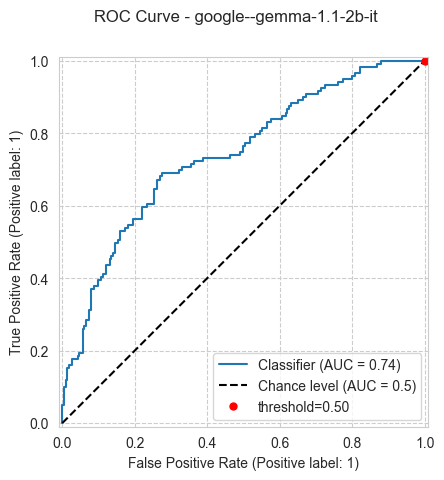

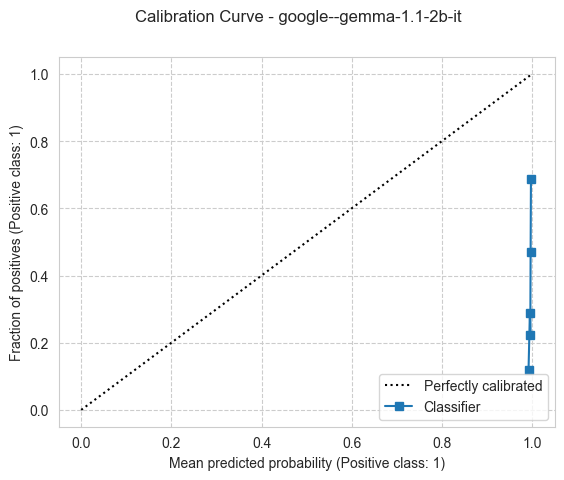

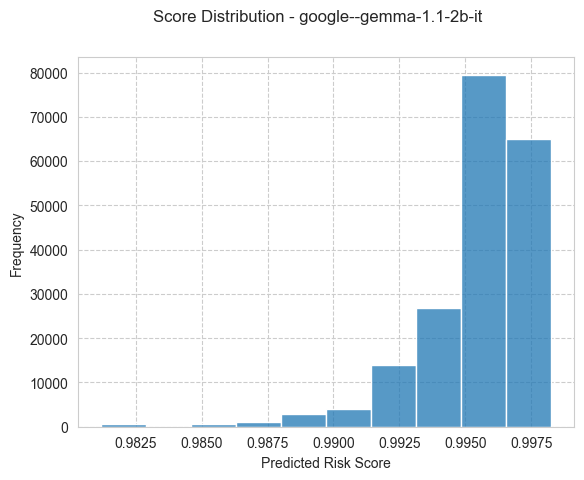

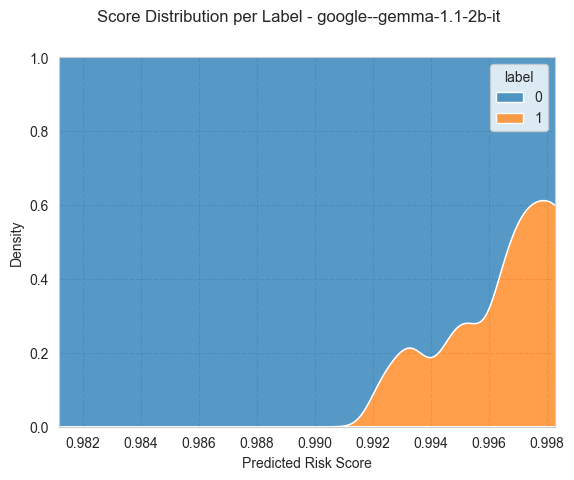

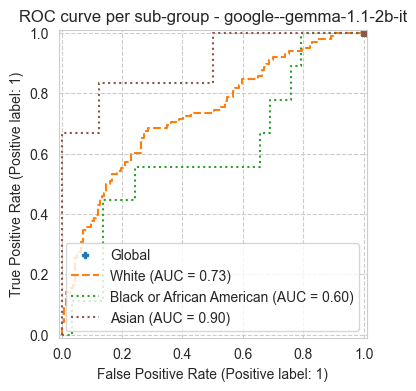

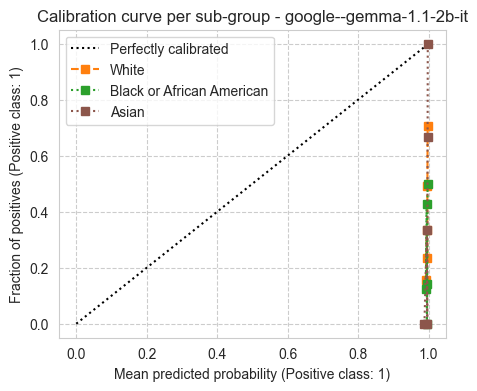

{'roc_curve_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/imgs/roc_curve.pdf',
 'calibration_curve_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/imgs/calibration_curve.pdf',
 'score_distribution_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/imgs/score_distribution.pdf',
 'score_distribution_per_label_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/imgs/score_distribution_per_label.pdf',
 'roc_curve_per_subgroup_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/imgs/roc_curve_per_subgroup.pdf',
 'calibration_curve_per_subgroup_path': '/Users/acruz/Documents/folktexts/notebooks/res/google--gemma-1.1-2b-it_bench-4259224612/imgs/calibration_curve_per_subgroup.pdf'}

In [10]:
bench.plot_results()

---